1/1 [==============================] - 1s 1s/step


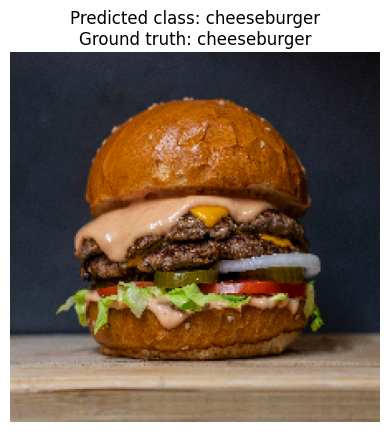

Predicted class: cheeseburger
Correct prediction!

1/1 [==============================] - 1s 508ms/step


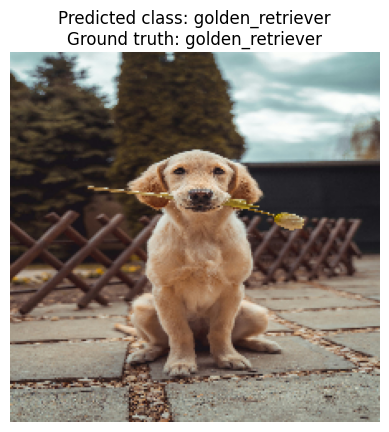

Predicted class: golden_retriever
Correct prediction!

1/1 [==============================] - 1s 521ms/step


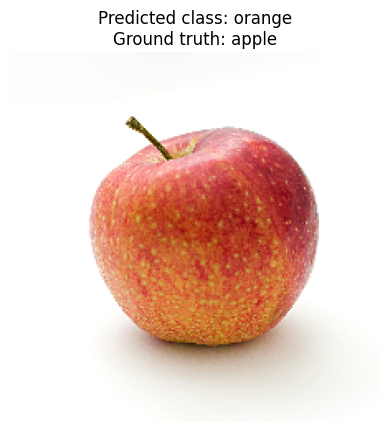

Predicted class: orange
Incorrect prediction

1/1 [==============================] - 0s 489ms/step


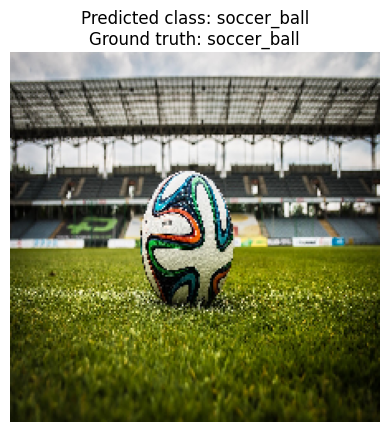

Predicted class: soccer_ball
Correct prediction!

1/1 [==============================] - 1s 521ms/step


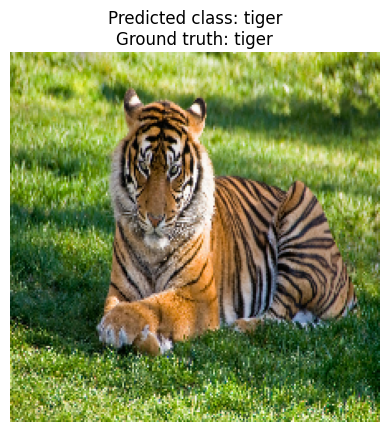

Predicted class: tiger
Correct prediction!

Accuracy:= 80.0 %


In [38]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# we are loading the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# created a function to predict the class and calculate accuracy
def calculate_accuracy(image_paths, ground_truth_labels,total_img):
   ans=0

# used for loop to predict class for each image
   for image_path, ground_truth_label in zip(image_paths, ground_truth_labels):

        # we are loading and preprocessing the input image
        img = image.load_img(image_path, target_size=(224, 224))  # VGG16 input size
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Geting model predictions
        predictions = model.predict(img_array)
        decoded_predictions = decode_predictions(predictions, top=1)[0]
        top_prediction = decoded_predictions[0]
        predicted_label = top_prediction[1]

        # we are displaying the image with predicted class and its ground truth
        plt.figure()
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted class: {predicted_label}\nGround truth: {ground_truth_label}")
        plt.show()



        print(f"Predicted class: {predicted_label}")


        if predicted_label == ground_truth_label:
            print("Correct prediction!")
            ans=ans+1
            print()
            # return 1
        else:
            print("Incorrect prediction")
            print()
            # return 0

   print("Accuracy:=",ans*100/total_img,"%")



if __name__ == "__main__":


    image_paths = ['/content/amirali-mirhashemian-sc5sTPMrVfk-unsplash.jpg', '/content/richard-brutyo-Sg3XwuEpybU-unsplash.jpg', '/content/pexels-mali-maeder-102104.jpg','/content/soccer-488700_1280.jpg','/content/pexels-jose-almeida-2649841.jpg']
    ground_truth_labels = ['cheeseburger', 'golden_retriever', 'apple','soccer_ball','tiger']

    calculate_accuracy(image_paths, ground_truth_labels,5)






